In [238]:
from arch import arch_model
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell 
from scipy.optimize import differential_evolution, LinearConstraint
import matplotlib.pyplot as plt
import datetime as dt

InteractiveShell.ast_node_interactivity = "all"

In [239]:
AAPL_data = pd.read_csv('data/AAPL.csv')
AAPL_data = AAPL_data.set_index('Date')

#인덱스를 datetime으로 변경
AAPL_data.index = pd.to_datetime(AAPL_data.index)
AAPL_data['log_price_return'] = np.log(AAPL_data['Adj Close']).diff(1)
AAPL_data['squared_log_price_return'] = AAPL_data['log_price_return'] ** 2

returns = AAPL_data['log_price_return'].dropna() 

### data
model will be estimated using the 11years (2000-01-03 ~ 2011-12-02)
and forecasts will be produced for 500 days (2011-12-05~2013-11-29)

In [236]:
am = arch_model(returns, vol="GARCH", p=1, o=0, q=1, dist='normal')
train_dt = dt.datetime(2011,12,5)
res = am.fit(last_obs=train_dt)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2398109889.2462683
Iteration:      2,   Func. Count:     20,   Neg. LLF: 16958.169756876465
Iteration:      3,   Func. Count:     31,   Neg. LLF: 9221.025149483623
Iteration:      4,   Func. Count:     42,   Neg. LLF: 155969.49382839285
Iteration:      5,   Func. Count:     54,   Neg. LLF: 12675.641380910429
Iteration:      6,   Func. Count:     61,   Neg. LLF: 12180852913.957203
Iteration:      7,   Func. Count:     72,   Neg. LLF: 94251907.50359564
Iteration:      8,   Func. Count:     83,   Neg. LLF: 751.3395412535995
Iteration:      9,   Func. Count:     92,   Neg. LLF: 51402.923372704296
Iteration:     10,   Func. Count:    103,   Neg. LLF: -5848.967047755593
Iteration:     11,   Func. Count:    110,   Neg. LLF: -6525.555044532981
Iteration:     12,   Func. Count:    116,   Neg. LLF: -6570.3037051593265
Iteration:     13,   Func. Count:    121,   Neg. LLF: -6568.477681392447
Iteration:     14,   Func. Count:    127,   Neg. LLF:

/Users/easydong/opt/anaconda3/envs/intern_project/lib/python3.8/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009946. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Axes: xlabel='Date'>

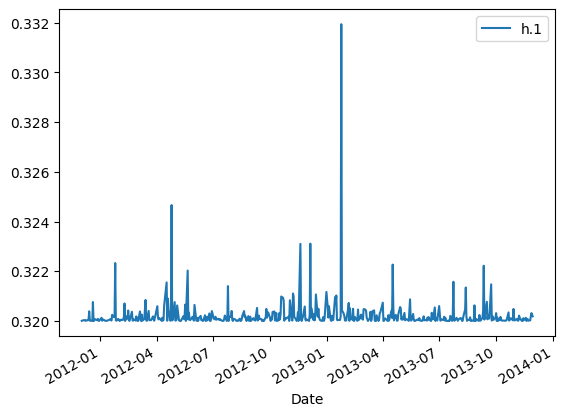

In [287]:
from arch.__future__ import reindexing

#예측 시작 Date 시점 상 한 시점 앞으로 예측 
test_dt= dt.datetime(2011,12,2)
fixes = am.fix([0.0016,0.32,0.67])

# fixes = am.fix([0.10804462 ,0.1053612  ,0.8944112 ])

forecasts = fixes.forecast(start = test_dt)

forecasts.variance[test_dt:].plot()
# forecasts.variance[test_dt:]


# forecasts = res.forecast(start = test_dt,reindex=False)
# forecasts.variance[test_dt:].plot()

# forecasts.variance[test_dt:]


In [234]:
df = forecasts.variance[test_dt:]
tmp = df[1:]
forcast_result = df[:-1]

forcast_result.index = tmp.index.tolist()
forcast_result



,h.1
2011-12-05,0.000451
2011-12-06,0.000424
2011-12-07,0.000395
2011-12-08,0.000369
2011-12-09,0.000345
...,...
2013-11-22,0.000259
2013-11-25,0.000249
2013-11-26,0.000245
2013-11-27,0.000272
